In [1]:

import numpy as np 
import pandas as pd 
import os

desktop_path = '/Users/esra/Desktop/Brain' 

for dirname, _, filenames in os.walk(desktop_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/Users/esra/Desktop/Brain/.DS_Store
/Users/esra/Desktop/Brain/Training/.DS_Store
/Users/esra/Desktop/Brain/Training/no_tumor/image(115).jpg
/Users/esra/Desktop/Brain/Training/no_tumor/image(142).jpg
/Users/esra/Desktop/Brain/Training/no_tumor/image(49).jpg
/Users/esra/Desktop/Brain/Training/no_tumor/image(1).jpg
/Users/esra/Desktop/Brain/Training/no_tumor/image(284).jpg
/Users/esra/Desktop/Brain/Training/no_tumor/image(154).jpg
/Users/esra/Desktop/Brain/Training/no_tumor/image(292).jpg
/Users/esra/Desktop/Brain/Training/no_tumor/image(103).jpg
/Users/esra/Desktop/Brain/Training/no_tumor/image(197).jpg
/Users/esra/Desktop/Brain/Training/no_tumor/image(178).jpg
/Users/esra/Desktop/Brain/Training/no_tumor/image(73).jpg
/Users/esra/Desktop/Brain/Training/no_tumor/image(251).jpg
/Users/esra/Desktop/Brain/Training/no_tumor/image(314).jpg
/Users/esra/Desktop/Brain/Training/no_tumor/image(24).jpg
/Users/esra/Desktop/Brain/Training/no_tumor/image (26).jpg
/Users/esra/Desktop/Brain/Training/no_t

In [2]:

num_files = len(os.listdir('/Users/esra/Desktop/Brain/Training/glioma_tumor'))
print('Total images of  training- glioma_tumor in directory:', num_files)


Total images of  training- glioma_tumor in directory: 826


In [3]:
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.optimizers import Adam
import tensorflow as tf
from sklearn.metrics import f1_score 

In [4]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/Users/esra/Desktop/Brain/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/Users/esra/Desktop/Brain/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [5]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [6]:
#Train test split
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)



In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)



Convolutional Neural Network

In [8]:
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))



In [9]:

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=3,validation_split=0.1)

Epoch 1/3
83/83 [==============================] - 56s 665ms/step - loss: 1.8409 - accuracy: 0.3057 - val_loss: 1.3671 - val_accuracy: 0.2891
Epoch 2/3
83/83 [==============================] - 55s 668ms/step - loss: 1.3519 - accuracy: 0.3129 - val_loss: 1.4008 - val_accuracy: 0.2891
Epoch 3/3
83/83 [==============================] - 55s 665ms/step - loss: 1.2248 - accuracy: 0.4465 - val_loss: 1.3461 - val_accuracy: 0.4694


In [14]:
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error

def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    mse = mean_squared_error(y_true, y_pred)
    return accuracy, f1, mse



# Test seti üzerinde tahminler yapma
# Convert predicted values to one-hot encoded format
y_pred_one_hot = tf.keras.utils.to_categorical(y_pred_model, num_classes=4)

# Now you can calculate metrics
accuracy1, f1_1, mse1 = calculate_metrics(y_test, y_pred_one_hot)

print("MODEL1 - Accuracy:", accuracy1, "F1 Score:", f1_1, "MSE:", mse1)


MODEL1 - Accuracy: 0.43425076452599387 F1 Score: 0.3454032525808025 MSE: 0.28287458


In [15]:
model2 = Sequential()
model2.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(0.3))

model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(Dropout(0.3))
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(0.4))  # Örneğin, dropout oranını değiştirdik

model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(0.4))  # Dropout oranını değiştirdik

model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(Conv2D(256,(3,3),activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(0.4))  # Dropout oranını değiştirdik

model2.add(Flatten())
model2.add(Dense(512,activation='relu'))
model2.add(Dense(512,activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(4,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history2 = model.fit(X_train,y_train,epochs=5,validation_split=0.1)

Epoch 1/5
83/83 [==============================] - 55s 660ms/step - loss: 0.9954 - accuracy: 0.5679 - val_loss: 1.0507 - val_accuracy: 0.5204
Epoch 2/5
83/83 [==============================] - 55s 658ms/step - loss: 0.8349 - accuracy: 0.6447 - val_loss: 0.9277 - val_accuracy: 0.6224
Epoch 3/5
83/83 [==============================] - 55s 661ms/step - loss: 0.8003 - accuracy: 0.6549 - val_loss: 0.9590 - val_accuracy: 0.6020
Epoch 4/5
83/83 [==============================] - 55s 666ms/step - loss: 0.6751 - accuracy: 0.7121 - val_loss: 1.2902 - val_accuracy: 0.5816
Epoch 5/5
83/83 [==============================] - 55s 662ms/step - loss: 0.6389 - accuracy: 0.7234 - val_loss: 0.8560 - val_accuracy: 0.6565


In [17]:
model3 = Sequential()
model3.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model3.add(Conv2D(64,(3,3),activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.4))  # Dropout oranını değiştirdik

model3.add(Conv2D(64,(3,3),activation='relu'))
model3.add(Conv2D(64,(3,3),activation='relu'))
model3.add(Dropout(0.4))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.5))  # Dropout oranını değiştirdik

model3.add(Conv2D(128,(3,3),activation='relu'))
model3.add(Conv2D(128,(3,3),activation='relu'))
model3.add(Conv2D(128,(3,3),activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.5))

model3.add(Conv2D(128,(3,3),activation='relu'))
model3.add(Conv2D(256,(3,3),activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(Dense(512,activation='relu'))
model3.add(Dense(512,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(4,activation='softmax'))
model3.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history3 = model.fit(X_train,y_train,epochs=6,validation_split=0.1)

Epoch 1/6
83/83 [==============================] - 56s 669ms/step - loss: 0.5451 - accuracy: 0.7741 - val_loss: 0.6123 - val_accuracy: 0.7211
Epoch 2/6
83/83 [==============================] - 56s 671ms/step - loss: 0.4547 - accuracy: 0.8074 - val_loss: 0.5962 - val_accuracy: 0.7619
Epoch 3/6
83/83 [==============================] - 55s 662ms/step - loss: 0.3932 - accuracy: 0.8362 - val_loss: 0.5130 - val_accuracy: 0.8095
Epoch 4/6
83/83 [==============================] - 55s 664ms/step - loss: 0.3174 - accuracy: 0.8812 - val_loss: 0.7254 - val_accuracy: 0.7143
Epoch 5/6
83/83 [==============================] - 55s 660ms/step - loss: 0.3393 - accuracy: 0.8645 - val_loss: 0.4444 - val_accuracy: 0.8197
Epoch 6/6
83/83 [==============================] - 55s 666ms/step - loss: 0.2469 - accuracy: 0.9016 - val_loss: 0.8538 - val_accuracy: 0.7245


In [18]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D(2, 2))
model4.add(Dropout(0.5))

model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(Dropout(0.5))
model4.add(MaxPooling2D(2, 2))
model4.add(Dropout(0.5))

model4.add(Conv2D(128, (3, 3), activation='relu'))
model4.add(Conv2D(128, (3, 3), activation='relu'))
model4.add(Conv2D(128, (3, 3), activation='relu'))
model4.add(MaxPooling2D(2, 2))
model4.add(Dropout(0.5))

model4.add(Conv2D(128, (3, 3), activation='relu'))
model4.add(Conv2D(256, (3, 3), activation='relu'))
model4.add(MaxPooling2D(2, 2))
model4.add(Dropout(0.5))

model4.add(Flatten())
model4.add(Dense(512, activation='relu'))
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(4, activation='softmax'))
model4.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history4 = model.fit(X_train,y_train,epochs=7,validation_split=0.1)

Epoch 1/7
83/83 [==============================] - 55s 663ms/step - loss: 0.2250 - accuracy: 0.9175 - val_loss: 0.4959 - val_accuracy: 0.8333
Epoch 2/7
83/83 [==============================] - 55s 662ms/step - loss: 0.2456 - accuracy: 0.9069 - val_loss: 0.4751 - val_accuracy: 0.8299
Epoch 3/7
83/83 [==============================] - 55s 663ms/step - loss: 0.1993 - accuracy: 0.9209 - val_loss: 0.4631 - val_accuracy: 0.8878
Epoch 4/7
83/83 [==============================] - 56s 672ms/step - loss: 0.1851 - accuracy: 0.9262 - val_loss: 0.3563 - val_accuracy: 0.8810
Epoch 5/7
83/83 [==============================] - 55s 668ms/step - loss: 0.1652 - accuracy: 0.9414 - val_loss: 0.3915 - val_accuracy: 0.8435
Epoch 6/7
83/83 [==============================] - 56s 678ms/step - loss: 0.1545 - accuracy: 0.9432 - val_loss: 0.3625 - val_accuracy: 0.9082
Epoch 7/7
83/83 [==============================] - 57s 686ms/step - loss: 0.1518 - accuracy: 0.9432 - val_loss: 0.3970 - val_accuracy: 0.8707


In [21]:
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D(2, 2))
model5.add(Dropout(0.4))

model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(Dropout(0.4))
model5.add(MaxPooling2D(2, 2))
model5.add(Dropout(0.4))

model5.add(Conv2D(128, (3, 3), activation='relu'))
model5.add(Conv2D(128, (3, 3), activation='relu'))
model5.add(Conv2D(128, (3, 3), activation='relu'))
model5.add(MaxPooling2D(2, 2))
model5.add(Dropout(0.4))

model5.add(Conv2D(128, (3, 3), activation='relu'))
model5.add(Conv2D(256, (3, 3), activation='relu'))
model5.add(MaxPooling2D(2, 2))
model5.add(Dropout(0.4))

model5.add(Flatten())
model5.add(Dense(512, activation='relu'))
model5.add(Dense(512, activation='relu'))
model5.add(Dropout(0.4))
model5.add(Dense(4, activation='softmax'))
model5.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history5 = model.fit(X_train,y_train,epochs=7,validation_split=0.1)

Epoch 1/7
83/83 [==============================] - 55s 666ms/step - loss: 0.1082 - accuracy: 0.9603 - val_loss: 0.3919 - val_accuracy: 0.9014
Epoch 2/7
83/83 [==============================] - 55s 665ms/step - loss: 0.1132 - accuracy: 0.9629 - val_loss: 0.3796 - val_accuracy: 0.9184
Epoch 3/7
83/83 [==============================] - 55s 667ms/step - loss: 0.0884 - accuracy: 0.9701 - val_loss: 0.3981 - val_accuracy: 0.8946
Epoch 4/7
83/83 [==============================] - 55s 662ms/step - loss: 0.0846 - accuracy: 0.9735 - val_loss: 0.4162 - val_accuracy: 0.9184
Epoch 5/7
83/83 [==============================] - 55s 664ms/step - loss: 0.1107 - accuracy: 0.9663 - val_loss: 0.5757 - val_accuracy: 0.8061
Epoch 6/7
83/83 [==============================] - 55s 665ms/step - loss: 0.1154 - accuracy: 0.9588 - val_loss: 0.4312 - val_accuracy: 0.8776
Epoch 7/7
83/83 [==============================] - 55s 666ms/step - loss: 0.0552 - accuracy: 0.9811 - val_loss: 0.7776 - val_accuracy: 0.8571


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
from sklearn.metrics import confusion_matrix

# Örnek tahminler (Model 1, Model 2, Model 3)
y_pred_classes_model = model.predict(X_test)
y_pred_classes_model = np.argmax(y_pred_classes_model, axis=1)

y_pred_classes_model2 = model2.predict(X_test)
y_pred_classes_model2 = np.argmax(y_pred_classes_model2, axis=1)

y_pred_classes_model3 = model3.predict(X_test)
y_pred_classes_model3 = np.argmax(y_pred_classes_model3, axis=1)

y_pred_classes_model4 = model4.predict(X_test)
y_pred_classes_model4 = np.argmax(y_pred_classes_model4, axis=1)

y_pred_classes_model5 = model5.predict(X_test)
y_pred_classes_model5 = np.argmax(y_pred_classes_model5, axis=1)

# Gerçek etiketler
y_true = np.argmax(y_test, axis=1)


# Model 1 karışıklık matrisi
conf_mat_model = confusion_matrix(y_true, y_pred_classes_model)
print("Confusion Matrix - Model 1:\n", conf_mat_model)

# Model 2 karışıklık matrisi
conf_mat_model2 = confusion_matrix(y_true, y_pred_classes_model2)
print("Confusion Matrix - Model 2:\n", conf_mat_model2)

# Model 3 karışıklık matrisi
conf_mat_model3 = confusion_matrix(y_true, y_pred_classes_model3)
print("Confusion Matrix - Model 3:\n", conf_mat_model3)

# Model 4 karışıklık matrisi
conf_mat_model4 = confusion_matrix(y_true, y_pred_classes_model4)
print("Confusion Matrix - Model 4:\n", conf_mat_model4)

# Model 5 karışıklık matrisi
conf_mat_model5 = confusion_matrix(y_true, y_pred_classes_model5)
print("Confusion Matrix - Model 5:\n", conf_mat_model5)



11/11 [==============================] - 2s 140ms/step
Confusion Matrix - Model 1:
 [[82  5  5  1]
 [24 64  2  5]
 [ 4  0 38 10]
 [ 1  1  0 85]]
Confusion Matrix - Model 2:
 [[ 0 91  2  0]
 [ 0 90  5  0]
 [ 0 46  6  0]
 [ 0 76 11  0]]
Confusion Matrix - Model 3:
 [[93  0  0  0]
 [95  0  0  0]
 [52  0  0  0]
 [87  0  0  0]]
Confusion Matrix - Model 4:
 [[83  1  9  0]
 [87  1  7  0]
 [44  0  8  0]
 [77  5  5  0]]
Confusion Matrix - Model 5:
 [[ 2  0  0 91]
 [17  0  0 78]
 [15  0  0 37]
 [21  0  2 64]]


In [35]:
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error

def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    mse = mean_squared_error(y_true, y_pred)
    return accuracy, f1, mse

# Calculate metrics for each model
accuracy1, f1_1, mse1 = calculate_metrics(y_true, y_pred_classes_model)
accuracy2, f1_2, mse2 = calculate_metrics(y_true, y_pred_classes_model2)
accuracy3, f1_3, mse3 = calculate_metrics(y_true, y_pred_classes_model3)
accuracy4, f1_4, mse4 = calculate_metrics(y_true, y_pred_classes_model4)
accuracy5, f1_5, mse5 = calculate_metrics(y_true, y_pred_classes_model5)

# Print metrics for each model
print("MODEL1 - Accuracy:", accuracy1, "F1 Score:", f1_1, "MSE:", mse1)
print("MODEL2 - Accuracy:", accuracy2, "F1 Score:", f1_2, "MSE:", mse2)
print("MODEL3 - Accuracy:", accuracy3, "F1 Score:", f1_3, "MSE:", mse3)
print("MODEL4 - Accuracy:", accuracy4, "F1 Score:", f1_4, "MSE:", mse4)
print("MODEL5 - Accuracy:", accuracy5, "F1 Score:", f1_5, "MSE:", mse5)


MODEL1 - Accuracy: 0.8226299694189603 F1 Score: 0.8191870225887377 MSE: 0.363914373088685
MODEL2 - Accuracy: 0.29357798165137616 F1 Score: 0.15649954261893728 MSE: 1.4220183486238531
MODEL3 - Accuracy: 0.28440366972477066 F1 Score: 0.12595019659239842 MSE: 3.3211009174311927
MODEL4 - Accuracy: 0.28134556574923547 F1 Score: 0.16005344047801473 MSE: 3.1345565749235473
MODEL5 - Accuracy: 0.2018348623853211 F1 Score: 0.10307887102274581 MSE: 4.391437308868501


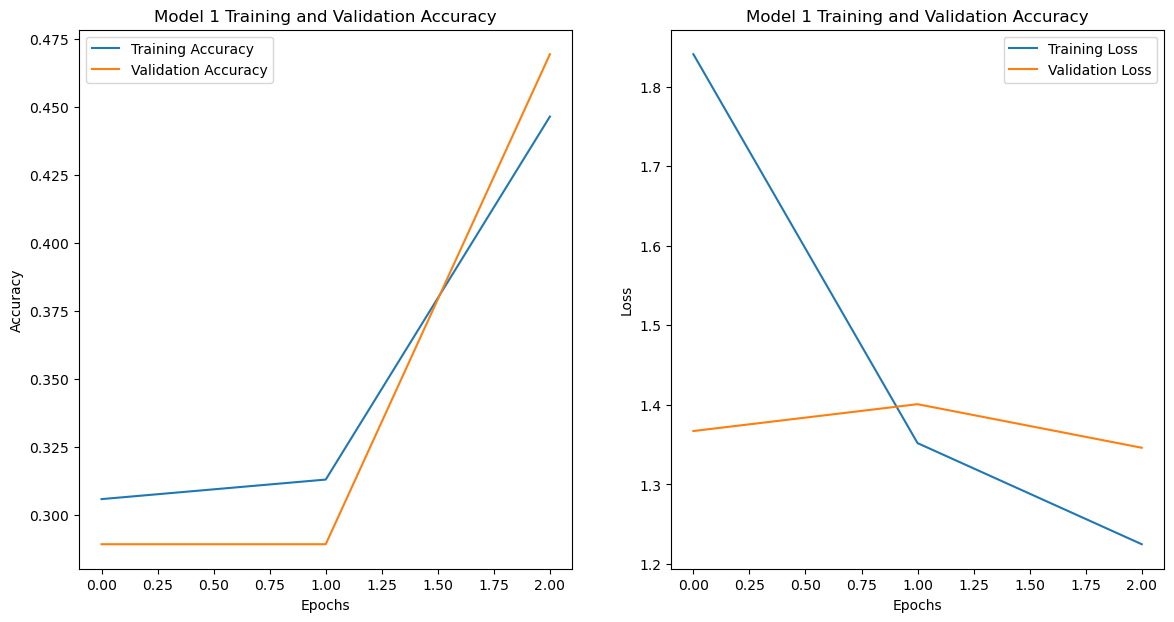

In [34]:
# Eğitim ve doğrulama metriklerini görüntüleme
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model 1 Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model 1 Training and Validation Accuracy')

plt.show()

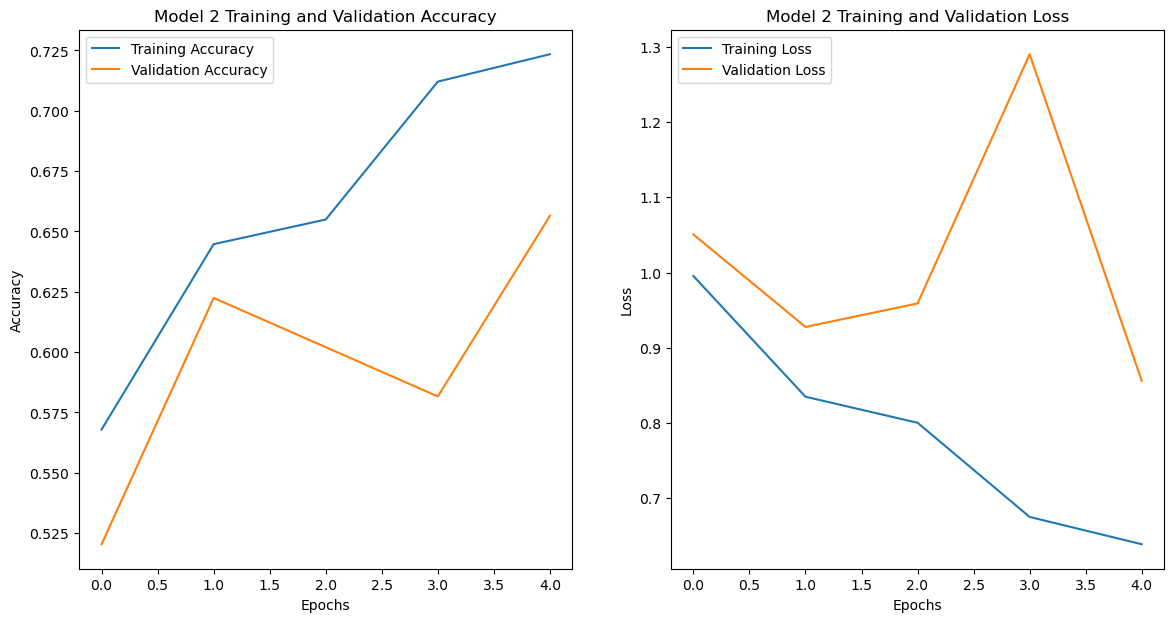

In [36]:
# Model 2 için eğitim ve doğrulama metriklerini görüntüleme
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model 2 Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model 2 Training and Validation Loss')

plt.show()

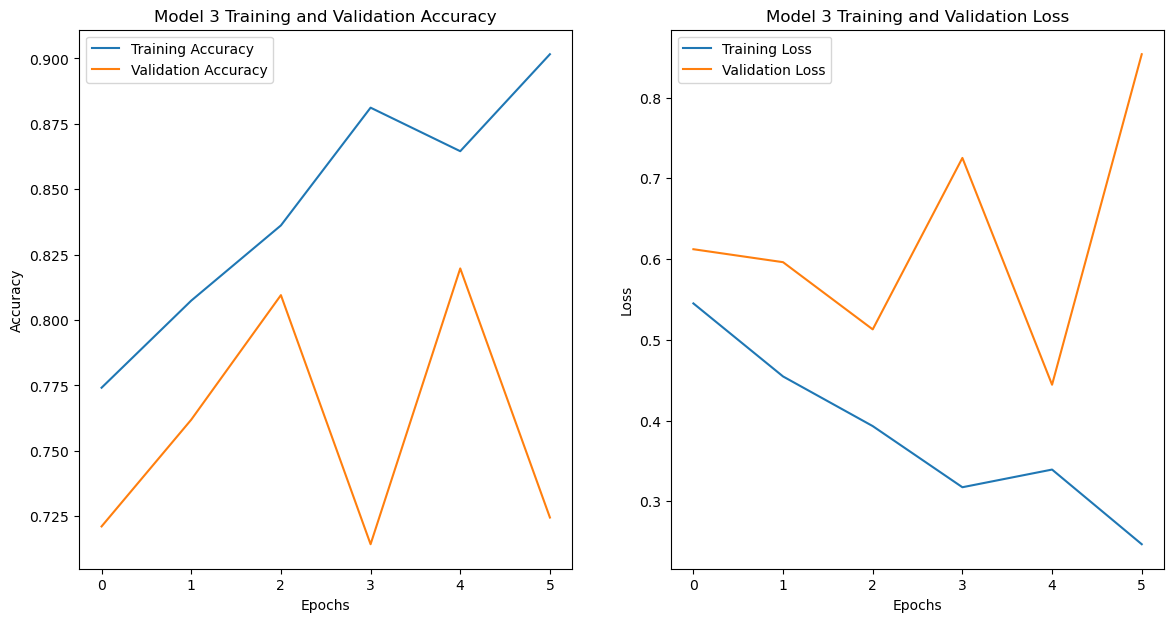

In [37]:
# Model 3 için eğitim ve doğrulama metriklerini görüntüleme
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model 3 Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model 3 Training and Validation Loss')

plt.show()


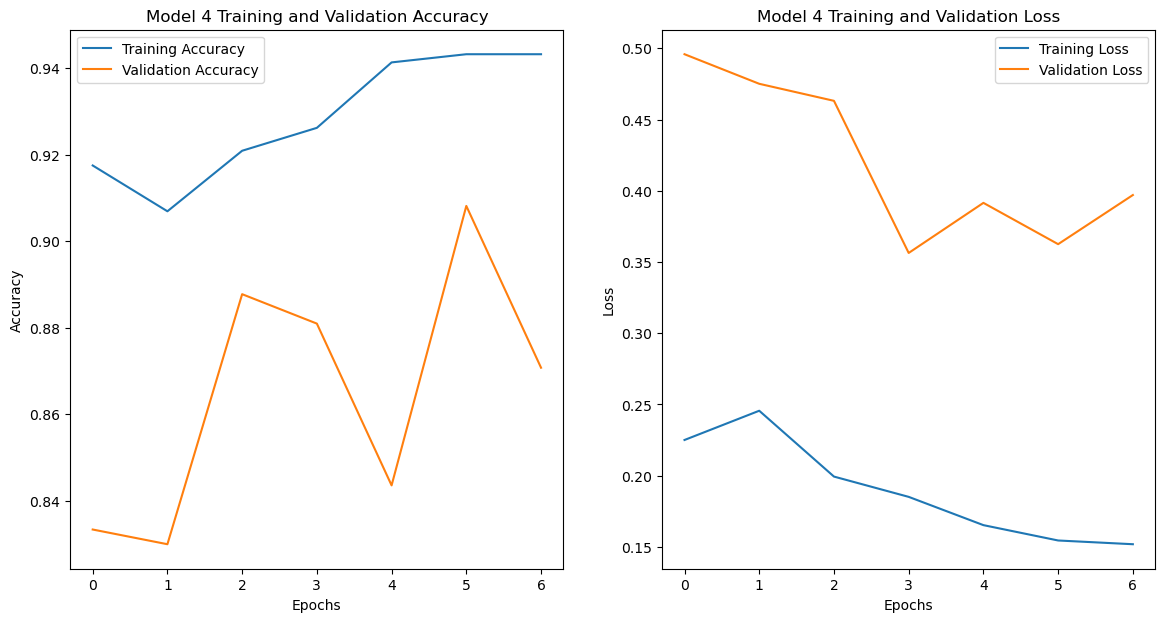

In [38]:
# Model 4 için eğitim ve doğrulama metriklerini görüntüleme
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model 4 Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model 4 Training and Validation Loss')

plt.show()



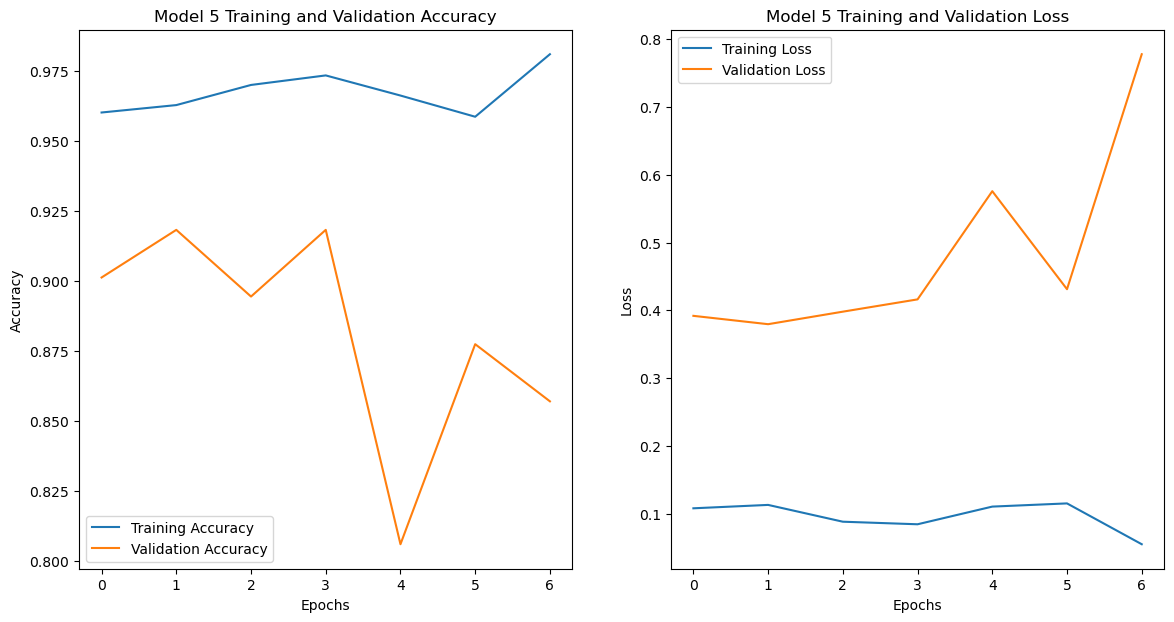

In [39]:
# Model 5 için eğitim ve doğrulama metriklerini görüntüleme
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history5.history['accuracy'], label='Training Accuracy')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model 5 Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model 5 Training and Validation Loss')

plt.show()


3